In [1]:
# Start writing code here...

## Import packages

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
# force inline plots
%matplotlib inline
import torch 
# import pymc3 as pm

## Target 1 Data simulation: Run stochastic simulation of S, I, R populations for $I(0) = 3$



In [3]:
%run /work/SIR_BayesianLikelihoodABC/SIR_simulator.ipynb

# Boarding school parameter values:
# beta0 = 0.00237
# alpha0 = 0.465
# Boarding school data:
# tdata0 = np.array([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
# ydata0 = np.array([3, 25, 75, 227, 296, 258, 236, 192, 126, 71, 28, 11, 7])
    

T = np.linspace(0,1099,num=1101,dtype = int)
tmin = 0;
tmax = T[-1]+2;

s0mean = 763;
i0mean = 3;
r0mean = 0;

alpha = 0.465 #.1;
beta = 0.00237 #.0002;

K = 10;
def generateSimulations(T,tmin,tmax, s0mean,i0mean, r0mean,alpha,beta,K):

    maxiter = 50000;
    s_new = np.empty((tmax,K))
    s_new[:]= np.NAN
    i_new = np.empty((tmax,K))
    i_new[:]= np.NAN
    r_new = np.empty((tmax, K))
    r_new[:]= np.NAN

    s0 = s0mean;
    i0 = i0mean;
    r0 = r0mean;
    for k in range(0,K):
        #s0 = np.random.poisson(s0mean);
        #i0 = np.random.poisson(i0mean);
        #r0 = np.random.poisson(r0mean);
        [s,i,r] = generateTarget1(T, s0, i0, r0, tmin, tmax, alpha, beta,maxiter)
        s_new[0:np.size(s),k] = s
        i_new[0:np.size(i),k] = i
        r_new[0:np.size(r),k] = r
        
    return [s_new,i_new,r_new]

[s_new,i_new,r_new] = generateSimulations(T,tmin,tmax, s0mean,i0mean, r0mean,alpha,beta,K)

 
# dfS = pd.DataFrame(s_new)
# dfI = pd.DataFrame(i_new)
# dfR = pd.DataFrame(r_new)

# dfS.to_csv('SData_i0_100.csv',index=False)
# dfI.to_csv('IData_i0_100.csv',index=False)
# dfI.to_csv('RData_i0_100.csv',index=False)

## Target 1: Plot results, Means are in black for Io = 100

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


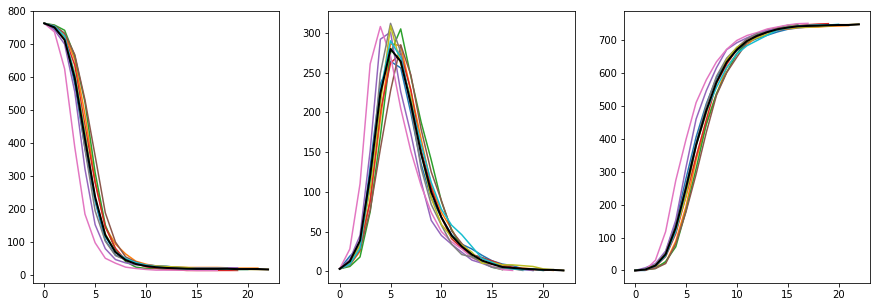

In [4]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
#fig.suptitle('Stochastically Generated SIR Data')
Smean = np.nanmean(s_new,1);
Imean = np.nanmean(i_new,1);
Rmean = np.nanmean(r_new,1);
axs[0].plot(T,s_new);
axs[0].plot(T,Smean,linewidth=2,color='black');
axs[1].plot(T,i_new);
axs[1].plot(T,Imean,linewidth=2,color='black');
axs[2].plot(T,r_new);
axs[2].plot(T,Rmean,linewidth=2,color='black');

# axs[0].plot(range(0,tmax),s_new);
# axs[0].plot(range(0,tmax),Smean,linewidth=2,color='black');
# axs[1].plot(range(0,tmax),i_new);
# axs[1].plot(range(0,tmax),Imean,linewidth=2,color='black');
# axs[2].plot(range(0,tmax),r_new);
# axs[2].plot(range(0,tmax),Rmean,linewidth=2,color='black');


## Target 1: Comparison of mean of stochastic model with solution to ODE for Io = 100.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


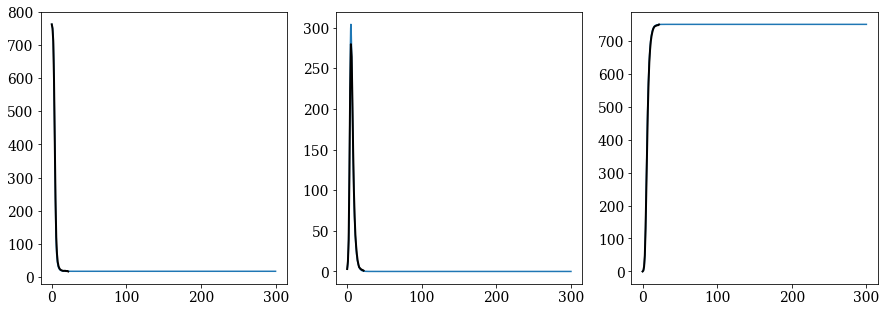

In [5]:
%run /work/SIR_BayesianLikelihoodABC/SIR_ODE.ipynb


MS.init_cond = np.array([s0mean, i0mean, r0mean])
soln = SolveSIRModel(alpha,beta)

t = soln.t
S = soln.y[0]
I = soln.y[1]
R = soln.y[2]

fig, axs = plt.subplots(1,3,figsize=(15,5))
#fig.suptitle('Stochastically Generated SIR Data')
Smean = np.nanmean(s_new,1);
Imean = np.nanmean(i_new,1);
Rmean = np.nanmean(r_new,1);
axs[0].plot(t,S);
axs[0].plot(T,Smean,linewidth=2,color='black');
axs[1].plot(t,I);
axs[1].plot(T,Imean,linewidth=2,color='black');
axs[2].plot(t,R);
axs[2].plot(T,Rmean,linewidth=2,color='black');

# axs[0].plot(t,S);
# axs[0].plot(range(0,tmax),Smean,linewidth=2,color='black');
# axs[1].plot(t,I);
# axs[1].plot(range(0,tmax),Imean,linewidth=2,color='black');
# axs[2].plot(t,R);
# axs[2].plot(range(0,tmax),Rmean,linewidth=2,color='black');

## Target 1: Comparison of mean of stochastic model with solution to ODE for Io = 1.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice


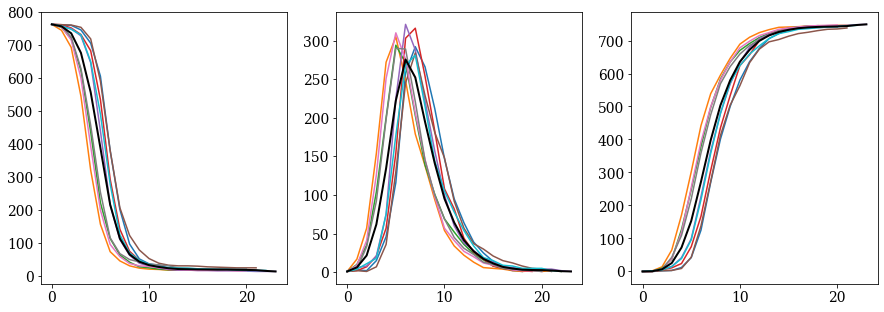

In [6]:
i0mean = 1;
[s_new,i_new,r_new] = generateSimulations(T,tmin,tmax, s0mean,i0mean, r0mean,alpha,beta,K)

# dfS = pd.DataFrame(s_new)
# dfI = pd.DataFrame(i_new)
# dfR = pd.DataFrame(r_new)

# dfS.to_csv('SData_i0_1.csv',index=False)
# dfI.to_csv('IData_i0_1.csv',index=False)
# dfI.to_csv('RData_i0_1.csv',index=False)


fig, axs = plt.subplots(1,3,figsize=(15,5))
#fig.suptitle('Stochastically Generated SIR Data')
Smean = np.nanmean(s_new,1);
Imean = np.nanmean(i_new,1);
Rmean = np.nanmean(r_new,1);
# axs[0].plot(range(0,tmax),s_new);
# axs[0].plot(range(0,tmax),Smean,linewidth=2,color='black');
# axs[1].plot(range(0,tmax),i_new);
# axs[1].plot(range(0,tmax),Imean,linewidth=2,color='black');
# axs[2].plot(range(0,tmax),r_new);
# axs[2].plot(range(0,tmax),Rmean,linewidth=2,color='black');

axs[0].plot(T,s_new);
axs[0].plot(T,Smean,linewidth=2,color='black');
axs[1].plot(T,i_new);
axs[1].plot(T,Imean,linewidth=2,color='black');
axs[2].plot(T,r_new);
axs[2].plot(T,Rmean,linewidth=2,color='black');

## Target 1: Comparison of mean of stochastic model with solution to ODE for Io = 1.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


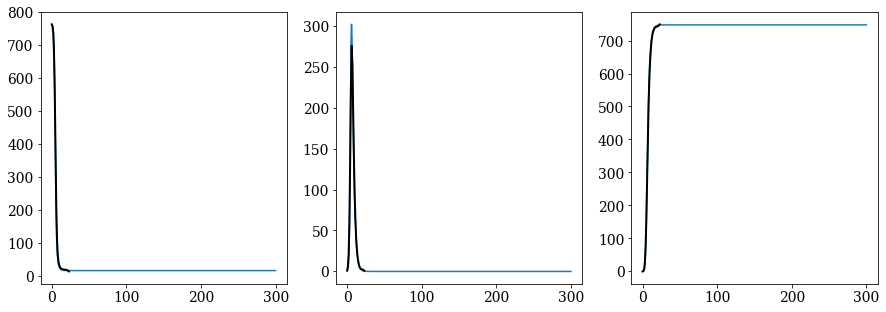

In [7]:
%run /work/SIR_BayesianLikelihoodABC/SIR_ODE.ipynb


MS.init_cond = np.array([s0mean, i0mean, r0mean])
soln = SolveSIRModel(alpha,beta)

t = soln.t
S = soln.y[0]
I = soln.y[1]
R = soln.y[2]

fig, axs = plt.subplots(1,3,figsize=(15,5))
#fig.suptitle('Stochastically Generated SIR Data')
Smean = np.nanmean(s_new,1);
Imean = np.nanmean(i_new,1);
Rmean = np.nanmean(r_new,1);
# axs[0].plot(t,S);
# axs[0].plot(range(0,tmax),Smean,linewidth=2,color='black');
# axs[1].plot(t,I);
# axs[1].plot(range(0,tmax),Imean,linewidth=2,color='black');
# axs[2].plot(t,R);
# axs[2].plot(range(0,tmax),Rmean,linewidth=2,color='black');

axs[0].plot(t,S);
axs[0].plot(T,Smean,linewidth=2,color='black');
axs[1].plot(t,I);
axs[1].plot(T,Imean,linewidth=2,color='black');
axs[2].plot(t,R);
axs[2].plot(T,Rmean,linewidth=2,color='black');

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b323b509-75b9-423f-bb04-ac84a2ad5053' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>